In [25]:
import sys
sys.path.append('C:\Python Work Directory\ThetaGammaAnalysis-yeticheese')

In [26]:
from src.utils import *
from src.functions import *
from src.process_functions import *
from src.signal import *
import scipy.io as sio
from dataclasses import asdict
import pandas as pd
from neurodsp.filt import filter_signal
import matplotlib.pyplot as plt
import matplotlib as mpl
from icecream import ic
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
import numpy as np
import scipy
import random
import emd

In [27]:
# Scientific to Float Print Format
np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:0.2f}'.format})

In [28]:
lfp=np.squeeze(sio.loadmat(r"C:\New folder\DataByCondition\StableCondOD\OS_Ephys_RGS14_Rat9_378134_SD6_OD_15-16_05_2020\2020-05-15_15-28-46_Trial5\HPC_100_CH9_0.continuous.mat")['HPC'])

In [29]:
wake = WakeSignal(lfp,1000,(4,12))

ic| 'No imf data, generating imfs....'
ic| 'No cycle data, extracting cycles....'


In [30]:
fpp_cycles = wake.get_fpp_cycles(frequencies=(15,140),band = 'gamma')

In [31]:
frequencies = np.arange(15,141,1)
angle = np.linspace (-180,180,19)

In [32]:
random_indices = [random.randint(0, fpp_cycles.shape[0]) for i in range(3)]

In [33]:
print(random_indices)

[1149, 1287, 140]


In [34]:
peaks = [peak_local_max(x, min_distance=1, threshold_abs=0) for x in fpp_cycles]

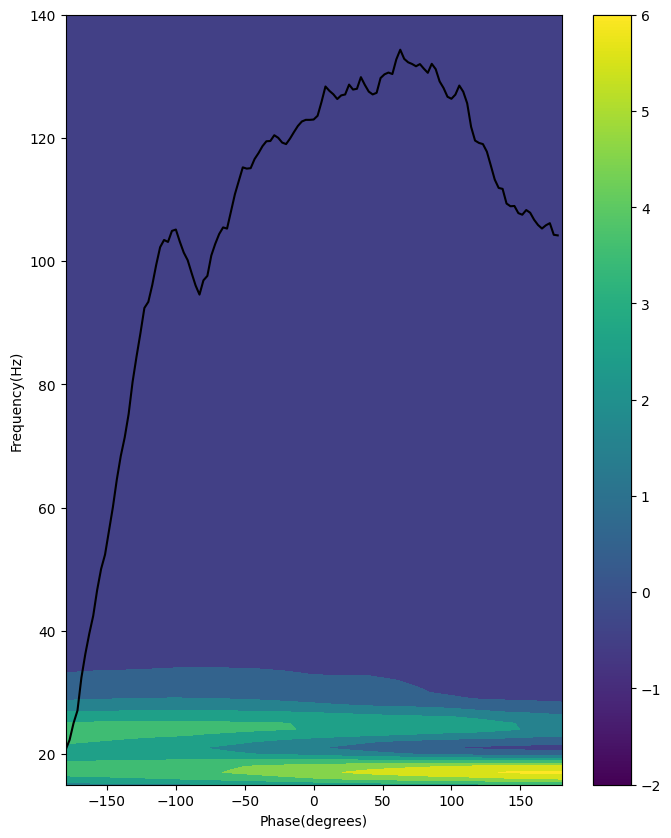

In [35]:
index = 27
vmin = -2
vmax = 6
fig=plt.figure(figsize=(8,10))
ax=fig.add_subplot(1,1,1, label="FPP plot")
ax2=fig.add_subplot(1,1,1, label="Signal Shape", frame_on=False)
ax2.set_axis_off()
# ax.set_axis_off()
# fig, ax1 = plt.subplots(figsize=(8, 10), sharex=True)
ax.contourf(angle,frequencies,fpp_cycles[index],vmin=vmin,vmax=vmax)
ax.set_xlabel('Phase(degrees)')
ax.set_ylabel('Frequency(Hz)')
# # ax1.scatter(angle[peaks[index][:,1]],frequencies[peaks[index][:,0]],color ='red')




# # im.set_clim(vmin, vmax)



theta_amplitude_values = wake.get_theta()[wake.cycles[index,0]-1:wake.cycles[index,-1]+1]
signal_amplitude_values = wake.signal[wake.cycles[index,0]-1:wake.cycles[index,-1]+1]
time_values = wake.get_duration()[wake.cycles[index,0]-1:wake.cycles[index,-1]+1]
# theta_binned_amplitudes = scipy.stats.binned_statistic(time_values,theta_amplitude_values,'mean', bins=19)[0]
# raw_binned_amplitudes = scipy.stats.binned_statistic(time_values,signal_amplitude_values,'mean', bins=19)[0]
# ax2 = ax1.twinx()
ax2.plot(range(len(signal_amplitude_values)),signal_amplitude_values,color='black')
ax2.set_xlim(0, len(signal_amplitude_values))
# ax2.plot(angle,np.zeros(len(angle)),color='white',linestyle = 'dashed')

# # max_positive = max(raw_binned_amplitudes)
# # max_negative = min(raw_binned_amplitudes)
# # absolute_max = max(abs(max_positive), abs(max_negative))
# # offset = absolute_max
# Create the colorbar
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=-2, vmax=6)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation='vertical', pad=0.05, alpha = 0, ticks=[])
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax2, orientation='vertical', pad=0.05)
# # max_positive = max(max(theta_binned_amplitudes), max(raw_binned_amplitudes))
# # max_negative = min(min(theta_binned_amplitudes), min(raw_binned_amplitudes))
# # absolute_max = max(abs(max_positive), abs(max_negative))
# # offset = absolute_max

# # ax2.set_ylim(-offset, offset)
# ax2.legend(['raw signal'])

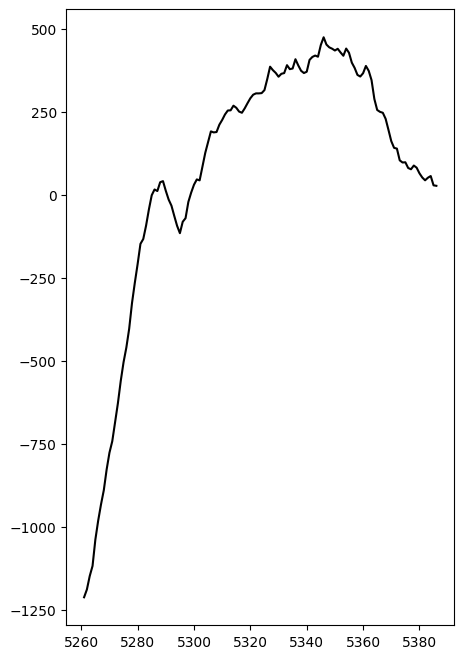

In [36]:
plt.gcf().set_size_inches(5, 8)
# plt.plot(time_values, theta_amplitude_values, color = 'red')
plt.plot(time_values, signal_amplitude_values, color = 'black')
# plt.plot(time_values,np.zeros(len(signal_amplitude_values)),linestyle='dashed')
# plt.legend(['theta','raw'])

ic| len(spectral_signature_peaks): 1708
ic| local_peaks[index]: array([[9, 2]], dtype=int64)


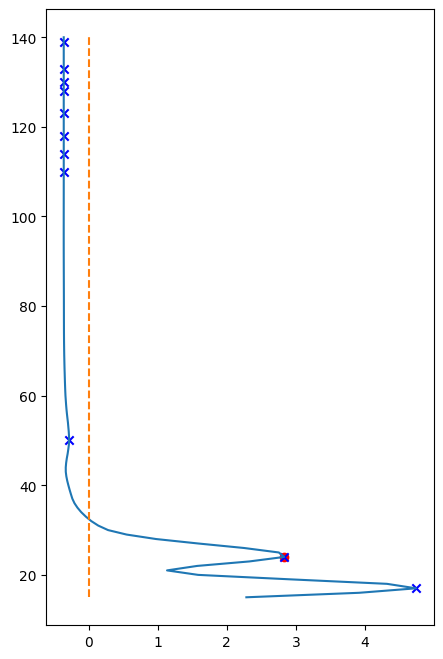

In [37]:
spectral_signatures = np.mean(fpp_cycles,axis=2)
spectral_signatures_bool = np.zeros(spectral_signatures.shape,dtype=bool)
local_peaks = [peak_local_max(x,min_distance=1,threshold_abs=0) for x in fpp_cycles]
spectral_signature_peaks = [scipy.signal.argrelmax(x) for x in spectral_signatures]
ic(len(spectral_signature_peaks))
for i,peaks in  enumerate(spectral_signature_peaks):
    spectral_signatures_bool[i][peaks] = True
ic(local_peaks[index])
plt.gcf().set_size_inches(5, 8)
plt.plot(spectral_signatures[index],frequencies)
plt.plot(np.zeros((126,)),frequencies, linestyle='dashed')
plt.scatter(spectral_signatures[index][local_peaks[index][:,0]],frequencies[local_peaks[index][:,0]], color='red')
plt.scatter(spectral_signatures[index][spectral_signatures_bool[index]],frequencies[spectral_signatures_bool[index]], color='blue',marker='x')

ic| spectral_signatures_a.shape: (1708, 19)
ic| len(spectral_signature_peaks_a): 1708
ic| local_peaks[index]: array([[9, 2]], dtype=int64)


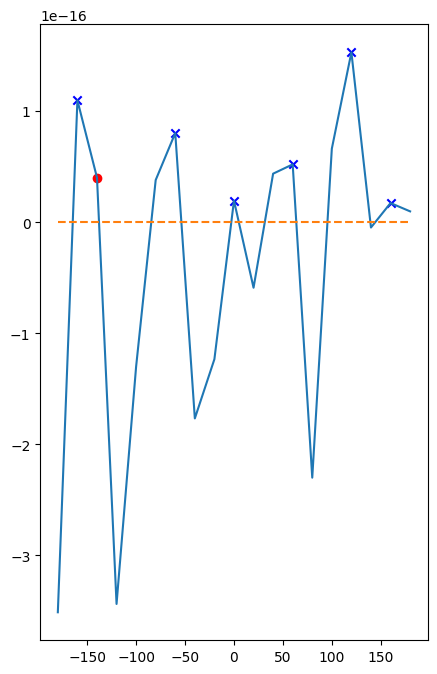

In [38]:
spectral_signatures_a = np.mean(fpp_cycles,axis=1)
ic(spectral_signatures_a.shape)
spectral_signatures_bool_a = np.zeros(spectral_signatures_a.shape,dtype=bool)
spectral_signature_peaks_a = [scipy.signal.argrelmax(x) for x in spectral_signatures_a]
ic(len(spectral_signature_peaks_a))
for i,peaks in  enumerate(spectral_signature_peaks_a):
    spectral_signatures_bool_a[i][peaks] = True
ic(local_peaks[index])
plt.gcf().set_size_inches(5, 8)
plt.plot(angle,spectral_signatures_a[index])
plt.plot(angle,np.zeros((19,)), linestyle='dashed')
plt.scatter(angle[local_peaks[index][:,1]],spectral_signatures_a[index][local_peaks[index][:,1]], color='red')
plt.scatter(angle[spectral_signatures_bool_a[index]],spectral_signatures_a[index][spectral_signatures_bool_a[index]], color='blue',marker='x')

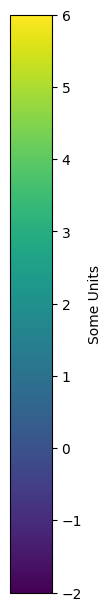

In [39]:
fig, ax = plt.subplots(figsize=(1, 6), layout='constrained')

cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=-2, vmax=6)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='vertical', label='Some Units')

In [40]:
ic(wake.mask_freq)

ic| wake.mask_freq: array([139.30, 23.27, 8.25, 2.53, 0.98, 0.48])


array([139.30, 23.27, 8.25, 2.53, 0.98, 0.48])

In [41]:
wake.imf.T.shape

(6, 329865)

<Axes: xlabel='Time (samples)'>

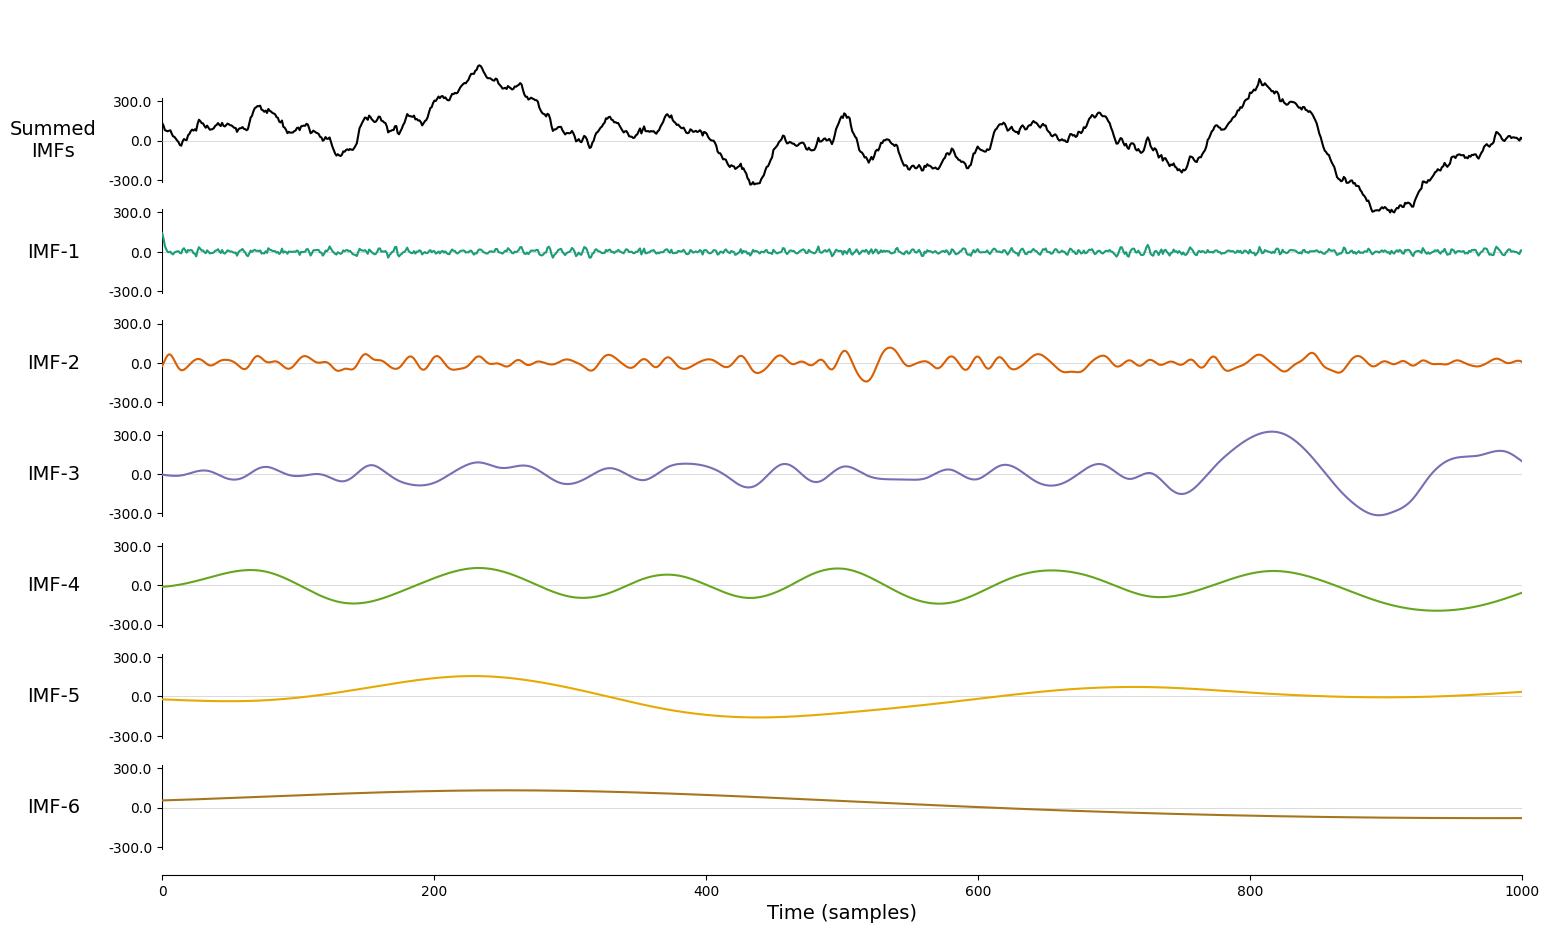

In [42]:
emd.plotting.plot_imfs(wake.imf[:1000])

In [43]:
sub_theta = wake.split_signals()[0]
ic(sub_theta.shape)
theta = wake.split_signals()[1]
MinThetaPeakAmplitude = np.median(np.abs(theta))
lowfreqthrs = np.copy(sub_theta)
lowfreqthrs[lowfreqthrs<MinThetaPeakAmplitude] = MinThetaPeakAmplitude
lowfreqthrs.shape

ic| sub_theta.shape: (329865,)


(329865,)

In [44]:
ic(sub_theta.std())
ic(theta.std())

ic| sub_theta.std(): 515.3744570691757
ic| theta.std(): 162.43645535005385


162.43645535005385

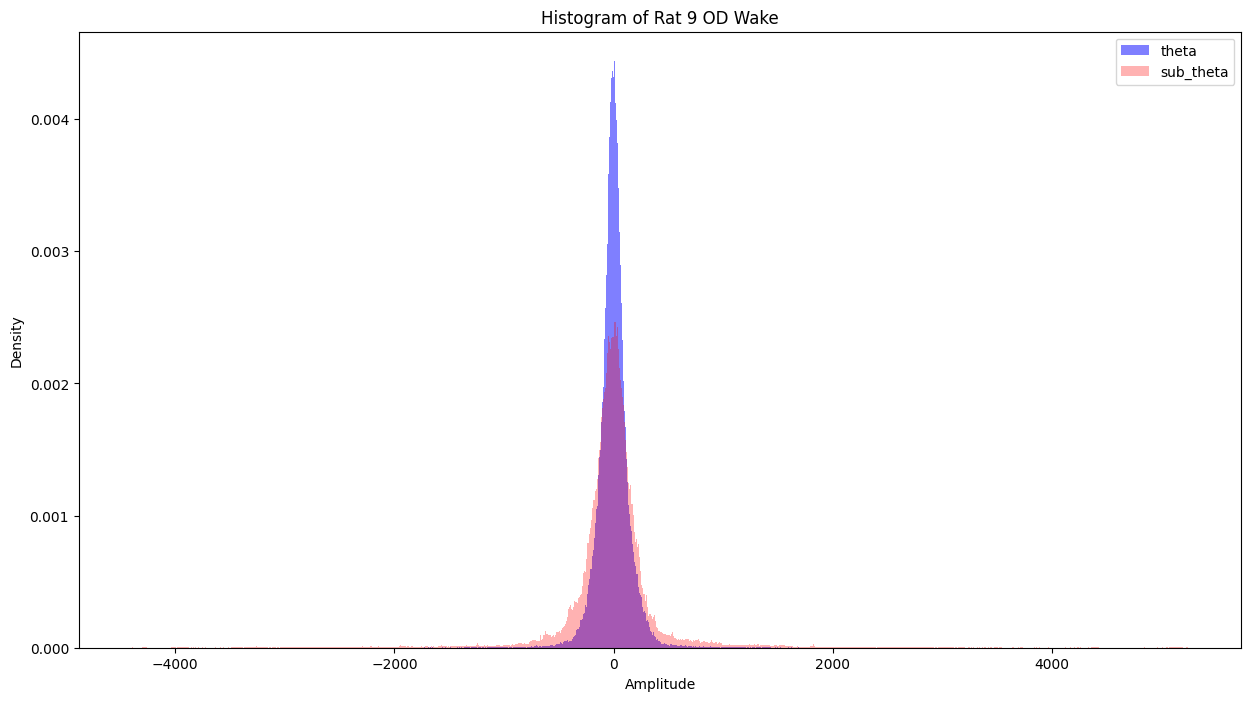

In [52]:
plt.gcf().set_size_inches(15, 8)
plt.hist(theta,bins=1000,alpha=0.5, color='blue',density=True, label='theta')
plt.hist(sub_theta,bins=1000, alpha= 0.3, color='red',density=True, label='sub_theta')
plt.ylabel('Density')
plt.xlabel('Amplitude')
plt.title('Histogram of Rat 9 OD Wake')
plt.legend(loc='upper right')

In [46]:
ic(wake.cycles.shape)

ic| wake.cycles.shape: (1708, 5)


(1708, 5)

In [47]:
ic(wake.apply_amplitude_threshold(mode='vitor'))
ic(wake.cycles.shape)

ic| wake.apply_amplitude_threshold(mode='vitor'): None
ic| wake.cycles.shape: (1252, 5)


(1252, 5)